In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### estimation on N (genome copy)

In [6]:
C = 40; D = 25; tau = 35; 
trkD_m = 0.0022;
hycE_m = 0.4657; 
galK_m = 0.6484; 
m = np.array([hycE_m, trkD_m, trkD_m, galK_m, galK_m, galK_m, galK_m]); 
N = np.array([10]); #plasmid
N = np.append(N, np.power(2, (C*(1-m)+D)/tau)); 
print(N)

[10.          2.50518003  3.61658628  3.61658628  2.16762364  2.16762364
  2.16762364  2.16762364]


### measured p_on_bulk

In [12]:
p_bulk = np.array([0.91, 0.385, 0.275, 0.278, 0.288, 0.205, 0.180, 0.134]);
labels = ['pos','hycE', 'trkD-A', 'trkD-B', 'galK-G', 'galK-I', 'galK-K', 'galK-M'];
colors = ['tab:red', 'tab:purple','tab:blue','tab:blue','tab:green','tab:green','tab:green','tab:green']; 

### estimated p_on

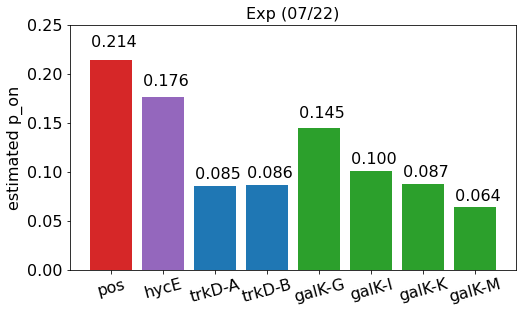

In [35]:
p_on_ind = 1-np.power(1-p_bulk, 1/N); 
x = np.arange(1,len(p_on_ind)+1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '% 0.3f' % height,
                ha='center', va='bottom')


plt.rcParams["figure.figsize"] = (8,4.5)
fig, ax = plt.subplots()
rect1 = ax.bar(x, p_on_ind, color=colors)
ax.set_ylabel('estimated p_on')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=15)
ax.set_title('Exp (07/22)')
ax.set_ylim((0,0.25))
autolabel(rect1)